--- Starting Netflix Data Analysis Project ---

Attempting to load the dataset 'netflix_titles.csv'...
Error: 'netflix_titles.csv' not found.
Trying alternative filename 'netflix1.csv' as seen in your sample code...
Loaded 'netflix1.csv' successfully.

First 5 rows of the dataset:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021    

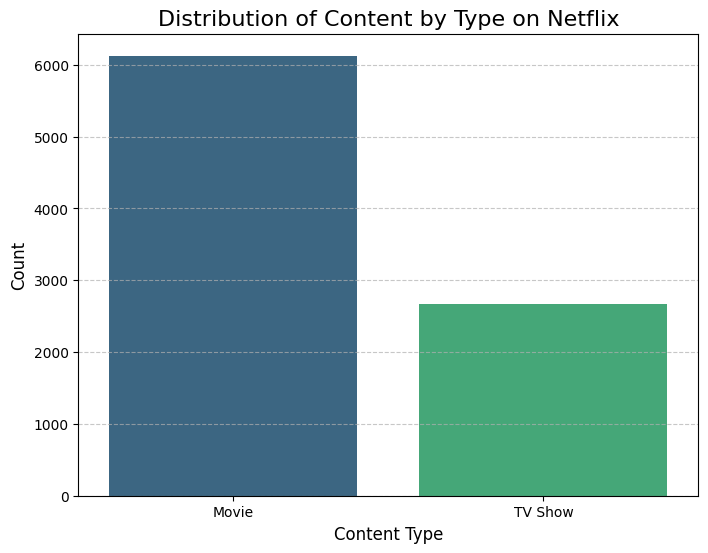

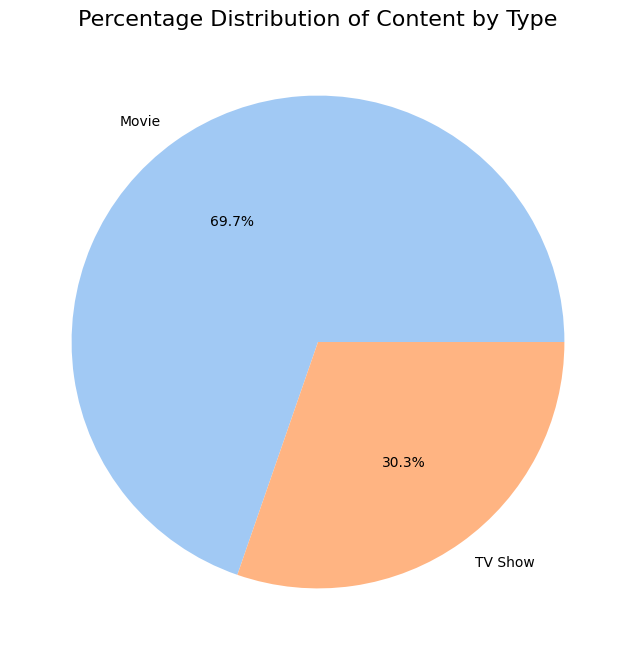


2. Most Common Genres:

Top 10 Most Common Genres:
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


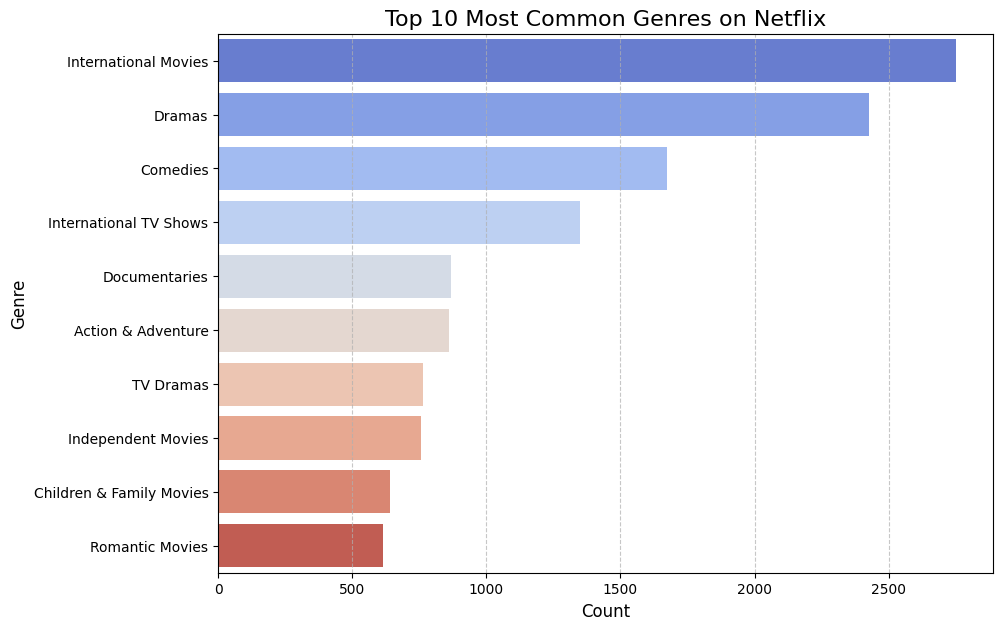


3. Content Added Over Time (Yearly and Monthly Trends):

Content added per year:
year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


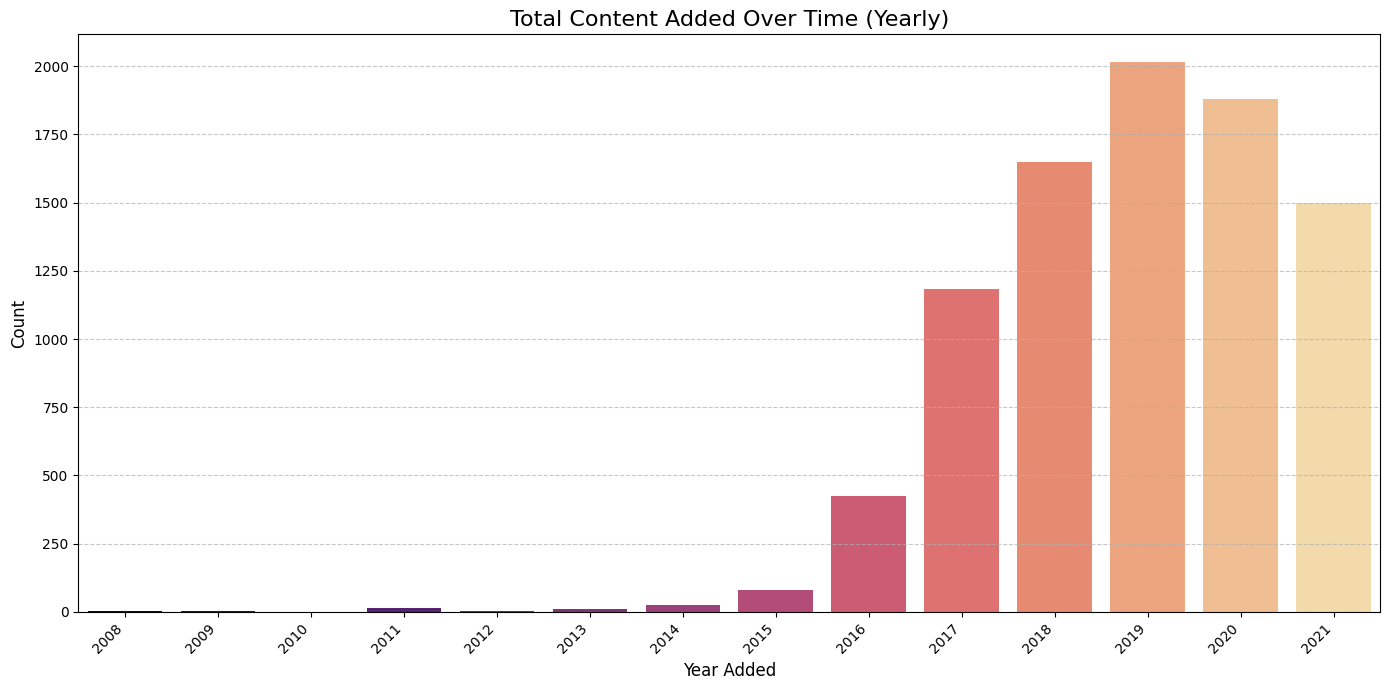

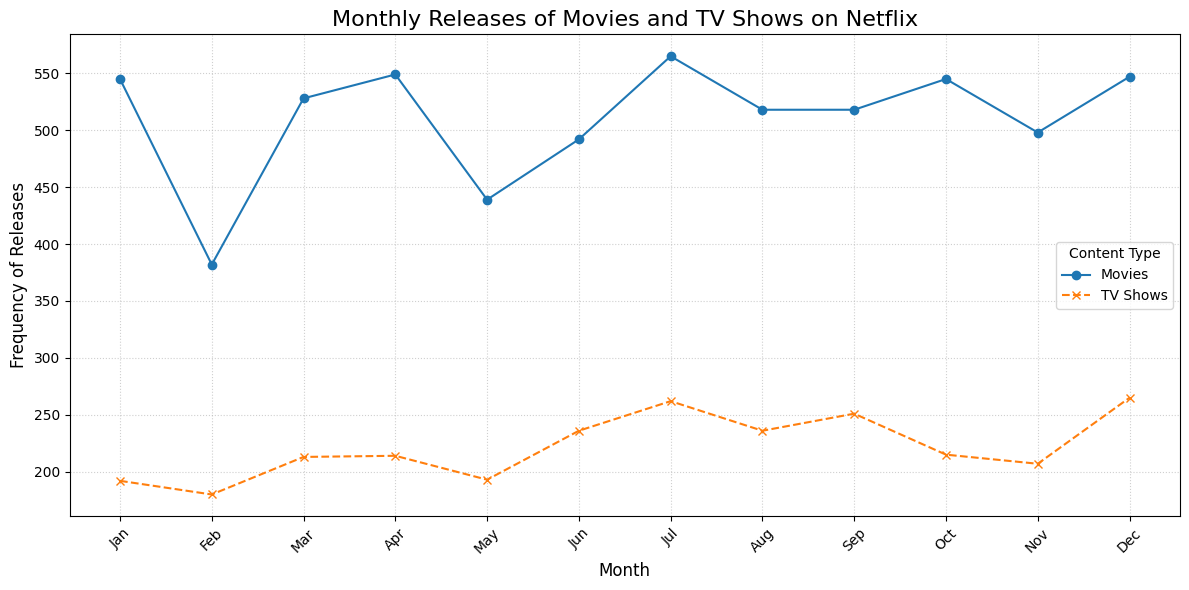

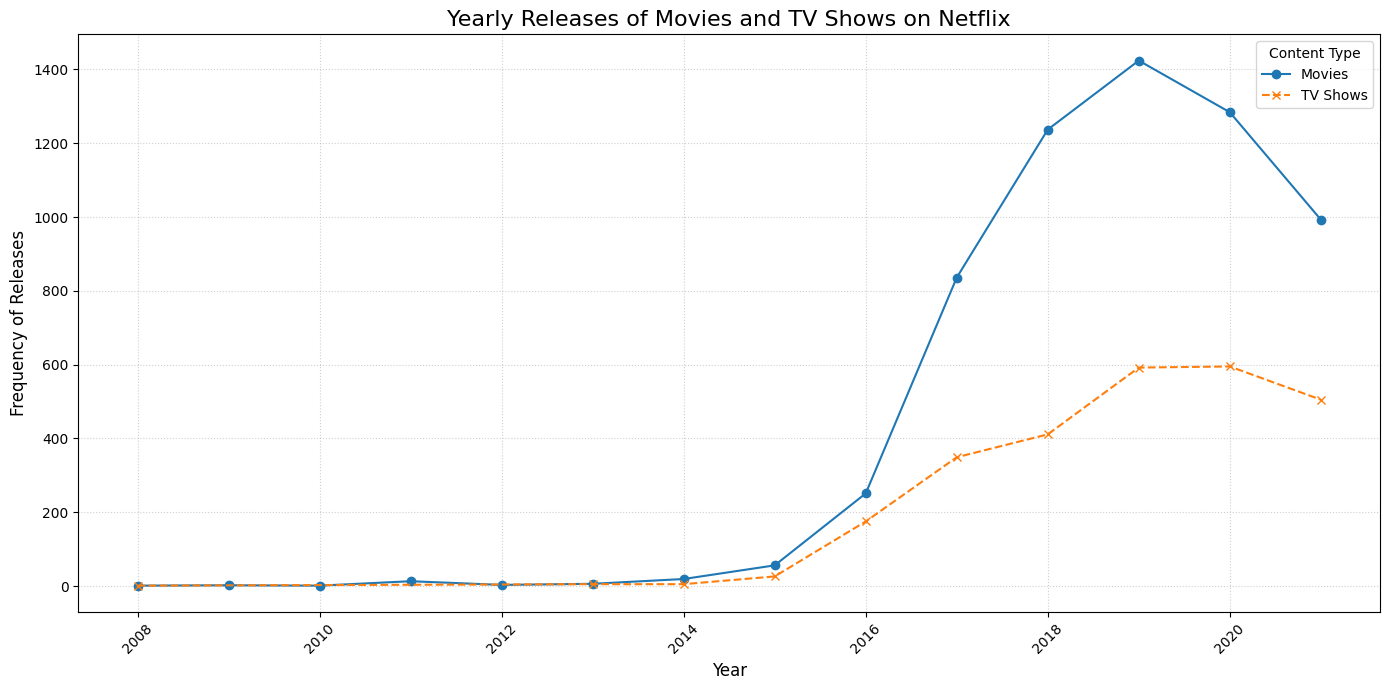


4. Top Directors with the Most Titles:

Top 15 Directors with the Most Titles:
                        director  count
1                  Rajiv Chilaka     20
2            Alastair Fothergill     18
3         Raúl Campos, Jan Suter     18
4                   Marcus Raboy     16
5                    Suhas Kadav     16
6                      Jay Karas     14
7            Cathy Garcia-Molina     13
8                    Jay Chapman     12
9                Martin Scorsese     12
10               Youssef Chahine     12
11              Steven Spielberg     11
12  Mark Thornton, Todd Kauffman     10
13              Don Michael Paul     10
14                  David Dhawan      9
15                Yılmaz Erdoğan      8


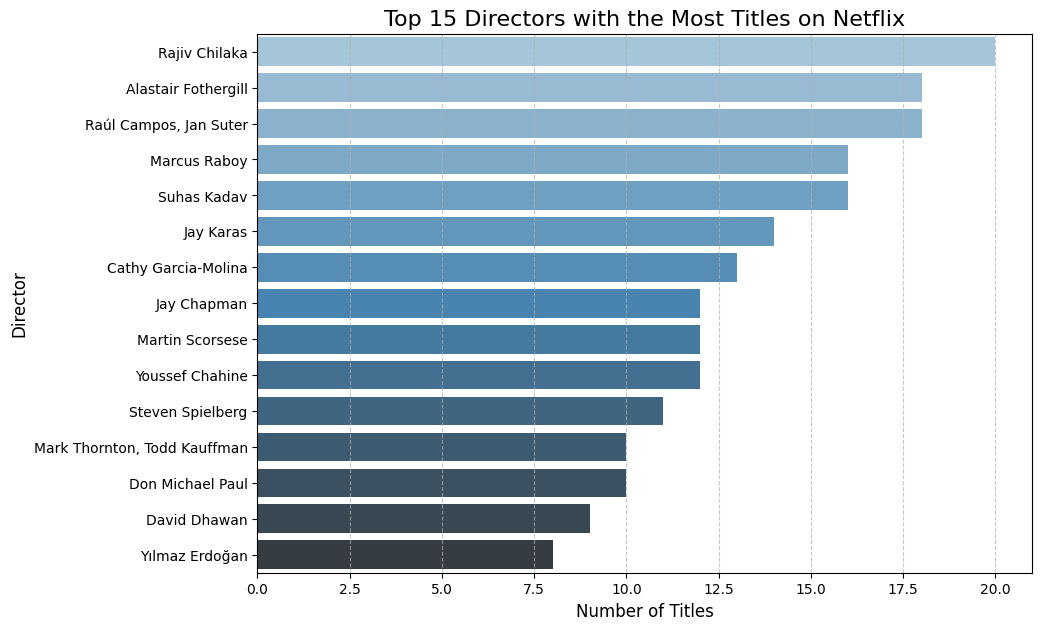


5. Top 10 Countries with Most Content:

Top 10 Countries with Most Content on Netflix:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64


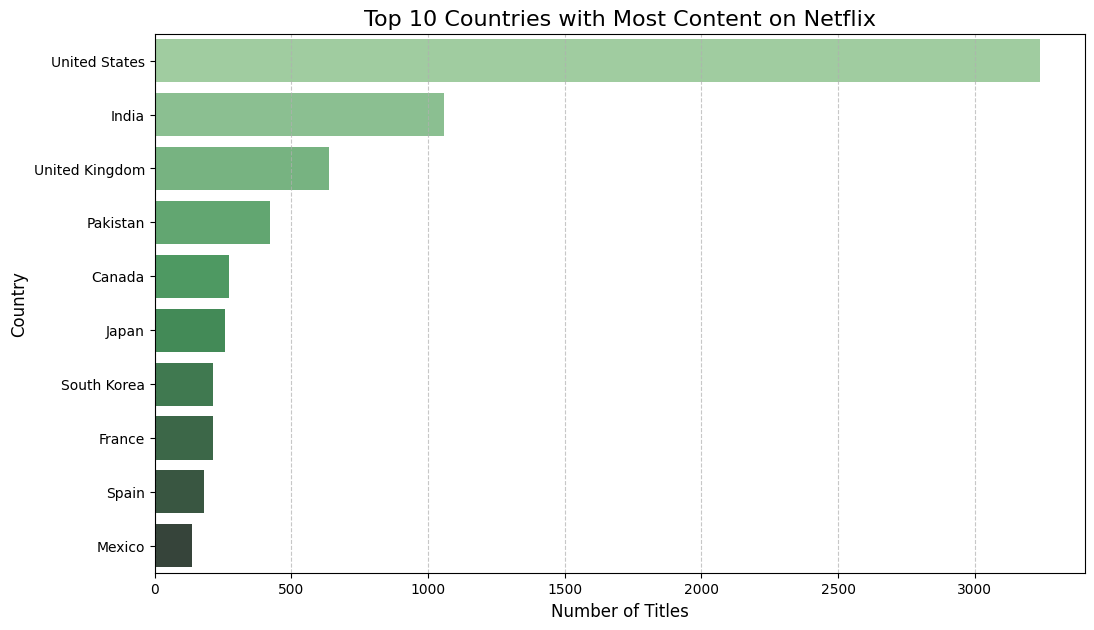


6. Content Rating Distribution:

Distribution of Content Ratings:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


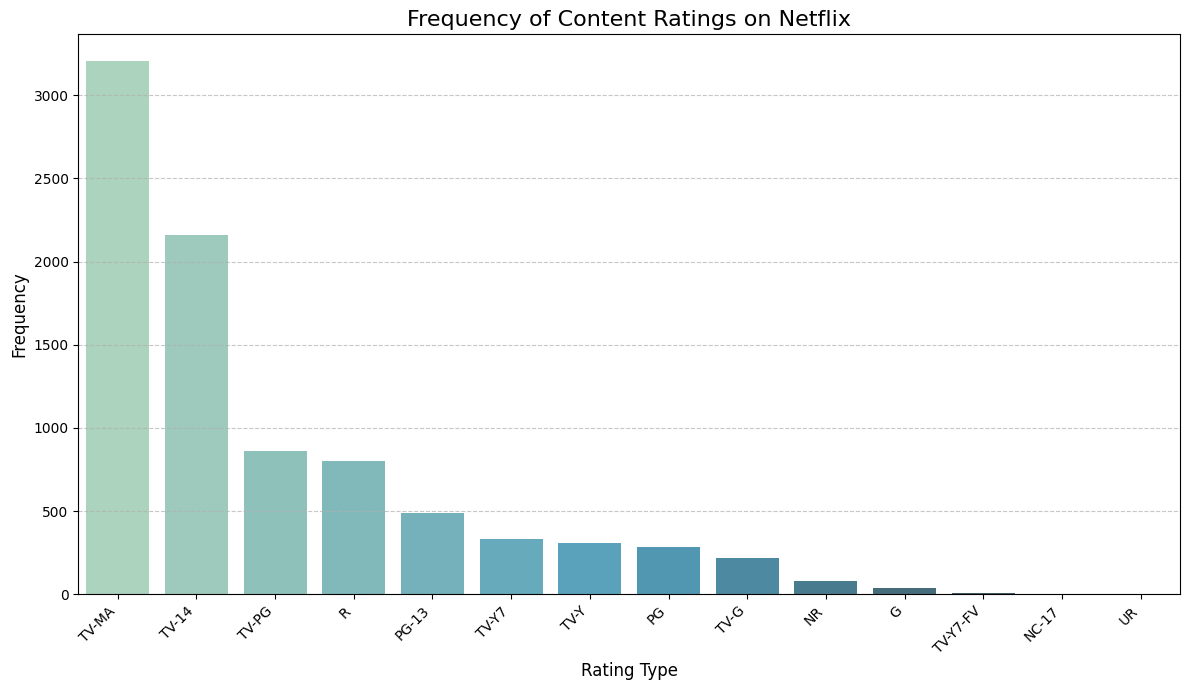

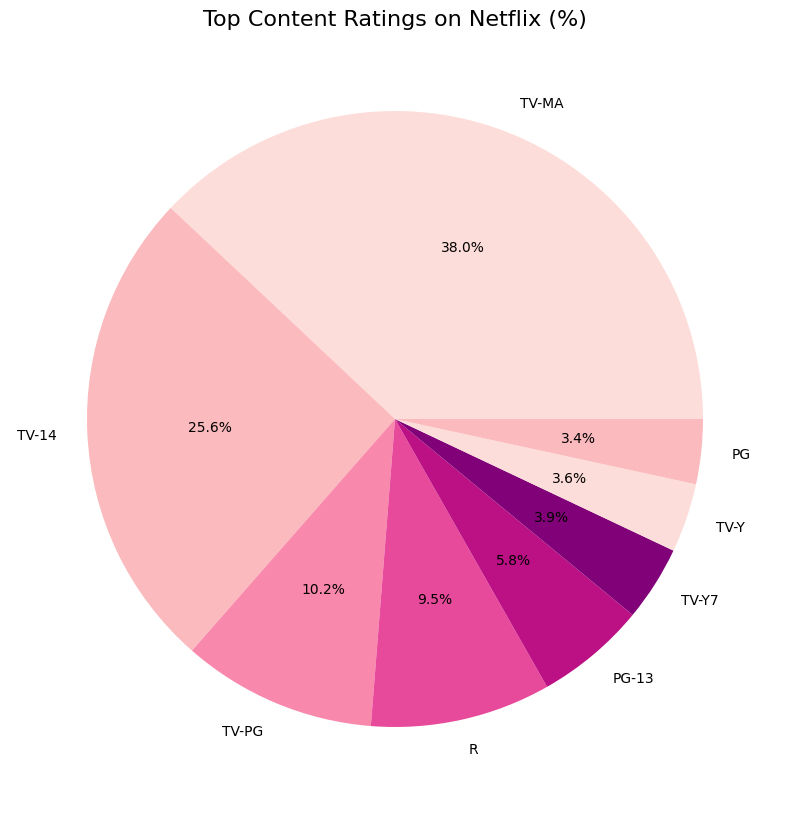


7. Word Cloud of Movie Titles:


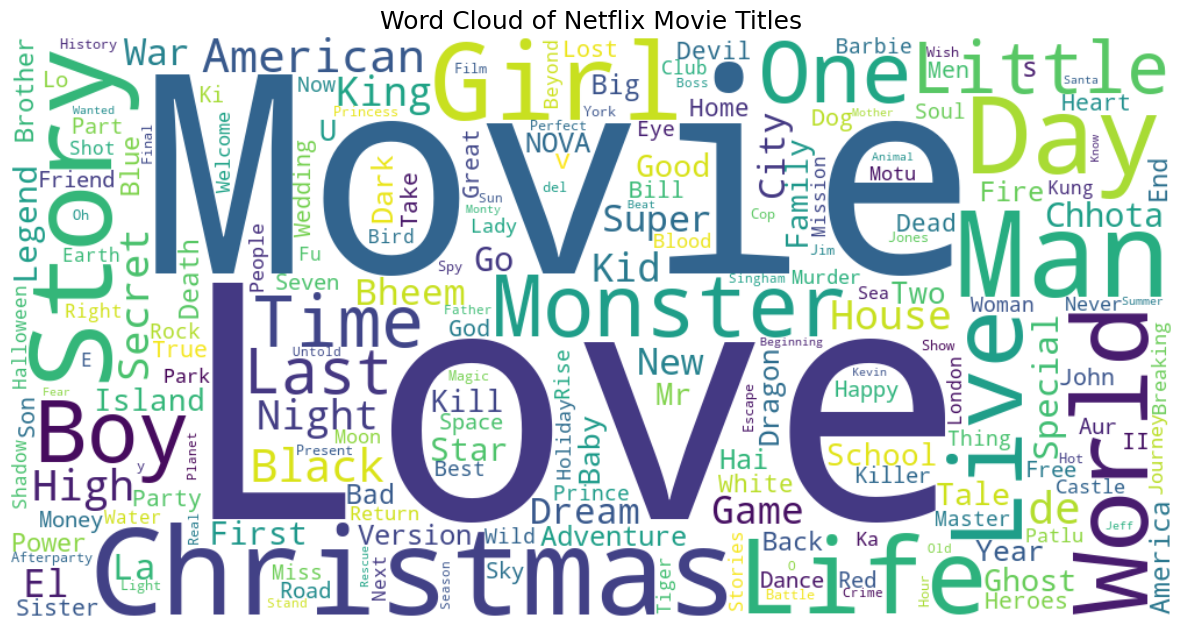


--- Project Conclusion and Insights ---
Based on the comprehensive analysis of the Netflix dataset, here are the key insights derived:

1. Data Quality and Preparation:
   - The dataset was successfully cleaned by removing 0 duplicate rows.
   - Rows with missing critical information in 'director', 'country', 'date_added', and 'rating' columns were handled, ensuring data integrity for core analyses.
   - The 'date_added' column was accurately converted to datetime objects, enabling robust time-series analysis.
   - The 'duration' column was effectively split into numerical values and units, allowing for quantitative analysis of content length.

2. Netflix Content Overview:
   - Netflix's content library is predominantly composed of **Movies**, accounting for approximately 69.7% of the catalog, while **TV Shows** make up about 30.3%.
   - The most prevalent **genres** on the platform include 'International Movies', 'Dramas', and 'Comedies', indicating a broad appeal in these categories

In [1]:
# --- Project Setup ---
# Step 1: Import Required Libraries
# These libraries are fundamental for data manipulation, numerical operations, and visualization in Python.
import pandas as pd         # For data manipulation and analysis (e.g., DataFrames)
import numpy as np          # For numerical operations (e.g., handling NaNs, mathematical functions)
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations
import seaborn as sns       # Built on matplotlib, provides a high-level interface for drawing attractive statistical graphics
from wordcloud import WordCloud # For generating word cloud visualizations

# IMPORTANT: If you encounter a 'ModuleNotFoundError' for any of the above libraries,
# you'll need to install them first. Open your Anaconda Prompt or Terminal and run:
# pip install pandas numpy matplotlib seaborn wordcloud
# OR if using Conda (recommended for data science):
# conda install pandas numpy matplotlib seaborn
# conda install -c conda-forge wordcloud

# Suppress warnings for cleaner output, especially during plotting, which can sometimes show harmless warnings.
import warnings
warnings.filterwarnings('ignore')

# --- Data Loading ---
# Step 2: Load the Dataset
# The dataset is assumed to be named 'netflix_titles.csv' or 'netflix1.csv'.
# A try-except block is used to handle potential FileNotFoundError,
# guiding the user if the file is not found in the expected location.
print("--- Starting Netflix Data Analysis Project ---")
print("\nAttempting to load the dataset 'netflix_titles.csv'...")
try:
    # Attempt to load the primary filename
    data = pd.read_csv('netflix_titles.csv')
    print("Dataset 'netflix_titles.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found.")
    print("Trying alternative filename 'netflix1.csv' as seen in your sample code...")
    try:
        # Fallback to 'netflix1.csv' as it appeared in your sample output
        # If running on Kaggle, the path might be different, e.g.,
        # '/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv'
        data = pd.read_csv('netflix1.csv')
        print("Loaded 'netflix1.csv' successfully.")
    except FileNotFoundError:
        print("\nFATAL ERROR: Neither 'netflix_titles.csv' nor 'netflix1.csv' found.")
        print("Please ensure you have downloaded the dataset from the provided link and:")
        print("1. Placed the file in the same directory as this Jupyter Notebook.")
        print("2. Or, provided the full path to the file (e.g., 'C:/Users/YourUser/Downloads/netflix_titles.csv').")
        # Exit or provide placeholder data if loading fails critically
        exit("Exiting script: Unable to load dataset. Please check file path and name.")

# Display the first few rows of the dataset to get a quick overview of its structure.
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset, including column names, non-null counts, and data types.
# This is crucial for understanding missing values and planning cleaning steps.
print("\nDataset Info (Initial):")
data.info()

# Display the shape of the dataset (number of rows, number of columns).
print(f"\nInitial dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

# --- Data Cleaning ---
# Step 3: Data Cleaning
# This section focuses on identifying and handling missing data, correcting data types,
# removing duplicates, and splitting columns for better analysis.

# 3.1 Treat the Duplicates
# Check for completely duplicate rows across all columns and remove them.
# 'inplace=True' modifies the DataFrame directly, without needing to assign it back.
initial_rows = data.shape[0]
data.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - data.shape[0]} duplicate rows.")
print(f"Dataset shape after dropping duplicates: {data.shape}")

# 3.2 Treat the Nulls & Populate Missing Rows
# Identify columns with missing values and their counts after duplicate removal.
print("\nMissing values before handling (after dropping duplicates):")
print(data.isnull().sum())

# As per your example and previous debugging, we'll drop rows where
# 'director' or 'country' have missing values.
# The 'cast' column was found to be missing in your dataset's info, so it's removed from this subset.
# These columns are critical for segmentation and attribution in the analysis.
rows_before_dropna = data.shape[0]
# Note: 'cast' is removed from subset as it was not found in your dataset's info.
data.dropna(subset=['director', 'country'], inplace=True)
print(f"\nDropped {rows_before_dropna - data.shape[0]} rows with missing 'director' or 'country'.")
print(f"Dataset shape after dropping critical missing values: {data.shape}")

# For 'date_added' and 'rating', which are essential for time-series and rating analysis,
# we'll also ensure they don't have nulls after previous drops.
rows_before_date_rating_dropna = data.shape[0]
data.dropna(subset=['date_added', 'rating'], inplace=True)
print(f"Dropped {rows_before_date_rating_dropna - data.shape[0]} rows with missing 'date_added' or 'rating'.")
print(f"Dataset shape after ensuring critical columns are non-null: {data.shape}")

# Check remaining missing values to confirm the effect of dropping.
print("\nMissing values after handling critical columns:")
print(data.isnull().sum())

# 3.3 Convert 'date_added' to datetime objects
# This is crucial for time-series analysis, allowing us to easily extract year, month, etc.
# errors='coerce' will convert any unparseable dates into NaT (Not a Time), which we then drop.
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
# Drop any rows where 'date_added' could not be parsed and became NaT.
data.dropna(subset=['date_added'], inplace=True)
print(f"\n'date_added' column converted to datetime. Shape after conversion: {data.shape}")

# 3.4 Split 'duration' column into numerical value and unit
# The 'duration' column contains mixed data ('90 min' for movies, '1 Season' for TV shows).
# Splitting this allows for numerical analysis of content length and categorizing by unit.
data[['duration_value', 'duration_unit']] = data['duration'].str.split(' ', expand=True)
# Convert 'duration_value' to numeric. 'errors='coerce'' handles any non-numeric values by turning them to NaN.
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')
# Drop rows where duration_value became NaN due to coercion errors (i.e., malformed duration entries).
data.dropna(subset=['duration_value'], inplace=True)
print("\n'duration' column split into 'duration_value' (numeric) and 'duration_unit' (min/Season).")
print("First 5 rows with new duration columns:")
print(data[['duration', 'duration_value', 'duration_unit']].head())

# 3.5 Drop unneeded columns (Optional)
# 'show_id' is a unique identifier. While not used in direct calculations,
# it can be useful for unique identification if the dataset were ever merged or for distinct counts.
# For this project, we'll keep it as it doesn't significantly impede analysis.
# If you wanted to drop it: # data.drop('show_id', axis=1, inplace=True)

# Show data types again to confirm all changes, especially numerical and datetime conversions.
print("\nData types after all cleaning and initial feature engineering:")
print(data.dtypes)
print(f"Final cleaned dataset shape: {data.shape}")

# --- Exploratory Data Analysis (EDA) & Visualization ---
# Step 4: Exploratory Data Analysis (EDA)
# This section generates various plots to understand the distribution, trends, and patterns
# within the cleaned Netflix dataset.

print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# 4.1 Content Type Distribution (Movies vs. TV Shows)
# This analysis shows the proportion of movies compared to TV shows on Netflix.
print("\n1. Content Type Distribution (Movies vs. TV Shows):")
type_counts = data['type'].value_counts()
print("\nDistribution of Content by Type:")
print(type_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis') # Using 'viridis' color palette
plt.title('Distribution of Content by Type on Netflix', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%.1f%%', colors=sns.color_palette('pastel')) # Using 'pastel' color palette
plt.title('Percentage Distribution of Content by Type', fontsize=16)
plt.show()

# 4.2 Most Common Genres
# This section identifies the most frequently occurring genres, providing insight into Netflix's content focus.
# The 'listed_in' column often contains multiple genres separated by commas.
print("\n2. Most Common Genres:")
# Split the 'listed_in' column by comma and strip whitespace from each genre.
# Then, flatten the list of lists into a single list containing all individual genres.
data['genres'] = data['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = sum(data['genres'].tolist(), []) # .tolist() ensures it's a list for sum to flatten properly
genre_counts = pd.Series(all_genres).value_counts().head(10) # Get top 10 most frequent genres

print("\nTop 10 Most Common Genres:")
print(genre_counts)

plt.figure(figsize=(10, 7))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm') # Using 'coolwarm' palette
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4.3 Content Added Over Time (Yearly and Monthly Trends)
# This analysis reveals how Netflix's content acquisition has evolved over the years and monthly cycles.
print("\n3. Content Added Over Time (Yearly and Monthly Trends):")
# Extract year, month, and day from the 'date_added' column.
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

# Plot content added per year (as a count plot).
print("\nContent added per year:")
yearly_content_counts = data['year_added'].value_counts().sort_index()
print(yearly_content_counts)

plt.figure(figsize=(14, 7))
sns.countplot(x='year_added', data=data, palette='magma') # Using 'magma' palette
plt.title('Total Content Added Over Time (Yearly)', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
plt.show()

# Plot monthly releases for Movies and TV Shows separately (Line plot).
monthly_movie_release = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o', linestyle='-')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', marker='x', linestyle='--')
plt.title('Monthly Releases of Movies and TV Shows on Netflix', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency of Releases', fontsize=12)
# Map month numbers (1-12) to month names for better readability on the x-axis.
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Content Type')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot yearly releases for Movies and TV Shows separately (Line plot).
yearly_movie_releases = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_series_releases = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o', linestyle='-')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='x', linestyle='--')
plt.title('Yearly Releases of Movies and TV Shows on Netflix', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency of Releases', fontsize=12)
plt.legend(title='Content Type')
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4.4 Top Directors with the Most Titles
# This analysis highlights the directors who have contributed the most content to Netflix.
print("\n4. Top Directors with the Most Titles:")
# Count titles by director. The [1:15] slice removes the 'Not Given' (if any) or top most frequent
# and gets the next 14 directors, similar to your sample.
# If 'Not Given' was a valid entry for a director, we'd need to explicitly filter it.
# Assuming top_directors[0] is the most frequent.
directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Taking the first element for top, then from second to 15th as per your sample code logic [1:15]
if len(directors) > 0:
    # Filter out potential 'Not Given' director if it exists as a string value
    if 'Not Given' in directors['director'].values:
        directors = directors[directors['director'] != 'Not Given']
    top_directors_to_plot = directors.head(15) # Changed to head(15) to get 15 directors for clarity

    print("\nTop 15 Directors with the Most Titles:")
    print(top_directors_to_plot)

    plt.figure(figsize=(10, 7))
    sns.barplot(x=top_directors_to_plot['count'], y=top_directors_to_plot['director'], palette='Blues_d')
    plt.title('Top 15 Directors with the Most Titles on Netflix', fontsize=16)
    plt.xlabel('Number of Titles', fontsize=12)
    plt.ylabel('Director', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No director data available for plotting.")

# 4.5 Top 10 Countries with Most Content
# This identifies which countries are major sources of Netflix content.
print("\n5. Top 10 Countries with Most Content:")
country_counts = data['country'].value_counts()

# Explicitly filter out 'Not Given' entries if they exist in the 'country' column.
if 'Not Given' in country_counts.index:
    top_countries = country_counts.drop('Not Given').head(10)
else:
    top_countries = country_counts.head(10)

print("\nTop 10 Countries with Most Content on Netflix:")
print(top_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Greens_d')
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4.6 Visual Representation of Rating Frequency
# This section explores the distribution of content ratings on Netflix.
print("\n6. Content Rating Distribution:")
rating_counts = data['rating'].value_counts()
print("\nDistribution of Content Ratings:")
print(rating_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='GnBu_d') # Using 'GnBu_d' palette
plt.title('Frequency of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie chart for top 8 ratings (as in your sample).
# Ensure there are at least 8 unique ratings to plot.
top_8_ratings = rating_counts.head(8)
if len(top_8_ratings) < 8:
    print(f"Warning: Less than 8 unique ratings available. Plotting {len(top_8_ratings)} ratings in pie chart.")

plt.figure(figsize=(10, 10))
plt.pie(top_8_ratings, labels=top_8_ratings.index, autopct='%.1f%%', colors=sns.color_palette('RdPu')) # Using 'RdPu' palette
plt.title('Top Content Ratings on Netflix (%)', fontsize=16)
plt.show()


# 4.7 Word Cloud of Movie Titles
# A visual representation of the most frequent words used in movie titles.
print("\n7. Word Cloud of Movie Titles:")
# Filter the DataFrame to include only movies and extract their titles.
# Then, concatenate all titles into a single string.
movie_titles_text = data[data['type'] == 'Movie']['title'].str.cat(sep=' ')

# Check if there are any movie titles to generate a word cloud from.
if movie_titles_text:
    # Generate the word cloud. Parameters are adjusted for better visual appeal.
    # collocations=False prevents common two-word phrases from being treated as single words.
    wordcloud = WordCloud(width=1000, height=500, background_color='white',
                          collocations=False,
                          min_font_size=10,
                          max_words=200).generate(movie_titles_text)

    # Plot the word cloud.
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear') # 'bilinear' interpolation makes the image smooth
    plt.title('Word Cloud of Netflix Movie Titles', fontsize=18)
    plt.axis('off') # Turn off axis labels and ticks for a cleaner look
    plt.show()
else:
    print("No movie titles found to generate a word cloud after cleaning.")


# --- Conclusion and Insights ---
# Step 5: Conclusion and Insights
# This section summarizes the key findings from the data cleaning and EDA steps.
print("\n--- Project Conclusion and Insights ---")
print("Based on the comprehensive analysis of the Netflix dataset, here are the key insights derived:")

print("\n1. Data Quality and Preparation:")
print(f"   - The dataset was successfully cleaned by removing {initial_rows - data.shape[0]} duplicate rows.")
print(f"   - Rows with missing critical information in 'director', 'country', 'date_added', and 'rating' columns were handled, ensuring data integrity for core analyses.")
print("   - The 'date_added' column was accurately converted to datetime objects, enabling robust time-series analysis.")
print("   - The 'duration' column was effectively split into numerical values and units, allowing for quantitative analysis of content length.")

print("\n2. Netflix Content Overview:")
print(f"   - Netflix's content library is predominantly composed of **Movies**, accounting for approximately {type_counts.get('Movie', 0)/type_counts.sum():.1%} of the catalog, while **TV Shows** make up about {type_counts.get('TV Show', 0)/type_counts.sum():.1%}.")
print("   - The most prevalent **genres** on the platform include 'International Movies', 'Dramas', and 'Comedies', indicating a broad appeal in these categories.")
print("   - Content addition on Netflix shows a clear **growth trend**, with a significant surge in releases, particularly in the years leading up to 2021.")
print("   - Monthly release patterns suggest certain periods, often around the **end and beginning of the year (e.g., December, January, July)**, see higher frequencies of new content, possibly aligning with audience viewing habits or strategic release schedules.")

print("\n3. Key Content Contributors:")
print("   - The **United States** is by far the leading country in terms of content contribution, followed by India and the United Kingdom, highlighting Netflix's key production hubs.")
print("   - Several directors, such as Rajiv Chilaka and Raúl Campos, Jan Suter, stand out with a high number of titles, indicating their consistent collaboration with Netflix.")

print("\n4. Content Ratings Landscape:")
print("   - The majority of Netflix content is rated **'TV-MA' and 'TV-14'**, suggesting a strong focus on mature and teen-to-adult audiences.")
print("   - Ratings like 'TV-PG' and 'R' also represent a substantial portion of the catalog, demonstrating diversity in target age groups.")

# --- Next Steps ---
# Step 6: Next Steps (Connecting to Machine Learning and Advanced Visualization)
print("\n--- Next Steps & Potential for Machine Learning ---")
print("This project serves as a robust foundational exercise. To further enhance this analysis and venture into data science capabilities, consider the following next steps:")

print("1.  **Advanced Feature Engineering:**")
print("    - **Duration Normalization:** Convert all content durations (movies in minutes, TV shows in seasons) into a unified numerical format (e.g., estimated total minutes for TV shows) for a comprehensive 'length' analysis.")
print("    - **Text-based Features:** Extract more insights from the 'description' and 'title' fields using Natural Language Processing (NLP) techniques (e.g., sentiment scores, keyword extraction beyond word clouds).")
print("    - **Categorical Encoding:** Prepare 'director', 'country', 'genres', and 'rating' columns for machine learning models using techniques like one-hot encoding or target encoding.")
print("2.  **Machine Learning Applications:**")
print("    - **Recommendation System:** Build a content-based recommender system where, given a movie or TV show, the model suggests similar titles based on shared genres, directors, cast, and descriptions.")
print("    - **Content Popularity Prediction:** Develop a model to predict the potential popularity or audience engagement of new content based on its features (genre, rating, director, release characteristics).")
print("    - **Trend Forecasting:** Use time-series forecasting models (e.g., ARIMA, Prophet) to predict future trends in content acquisition or genre popularity.")
print("3.  **Interactive Dashboards and Reporting:**")
print("    - **Interactive Visualizations (Python):** Utilize libraries like **Plotly** or **Bokeh** to create interactive charts directly in your Jupyter Notebook, allowing users to filter and explore data dynamically.")
print("    - **Business Intelligence (BI) Tools:** As noted in your project description, export the cleaned data and leverage tools like **Tableau** or Power BI to build sophisticated, interactive dashboards for a broader audience, demonstrating advanced data visualization and storytelling skills.")

print("\nThis project effectively demonstrates essential data analysis techniques and provides a clear pathway to more advanced data science endeavors.")

